In [1]:
# Libraries imported

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
#csv file
airline_data = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')

In [3]:
#info method on airline data
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
#head method on airline data
airline_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
#Check missing data
missing = pd.concat([airline_data.isnull().sum(), 100 * airline_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
Arrival Delay in Minutes,310,0.298352
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


In [6]:
#NaN values dropped from 'Arrival Delay in Minutes' column, 0.3% missing data dropped
airline_data.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [7]:
#Select dtypes
airline_data.select_dtypes(object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [8]:
#Value counts method for duplicate id's
airline_data['id'].value_counts().head()

70172    1
18481    1
26801    1
6259     1
17470    1
Name: id, dtype: int64

In [9]:
#count number of times both genders have been used
airline_data['Gender'].value_counts()

Female    52576
Male      51018
Name: Gender, dtype: int64

In [10]:
#count number of times ages have been used
airline_data['Age'].value_counts()

39    2961
25    2790
40    2569
44    2479
42    2453
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64

In [11]:
#count number of times customer types have been used
airline_data['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

In [12]:
#count number of times Travel types have been used
airline_data['Type of Travel'].value_counts()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

In [13]:
#count number of times class has been used
airline_data['Class'].value_counts()

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

In [14]:
#count number of times satisfaction has been marked
airline_data['satisfaction'].value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [15]:
#Filter the airline_data dataframe for rows where 'Class' and 'satisfaction' are different,
#group by method
(airline_data[airline_data.Class != airline_data.satisfaction]
 .groupby('Class')['satisfaction']
 .value_counts())

Class     satisfaction           
Business  satisfied                  34390
          neutral or dissatisfied    15143
Eco       neutral or dissatisfied    37922
          satisfied                   8671
Eco Plus  neutral or dissatisfied     5632
          satisfied                   1836
Name: satisfaction, dtype: int64

In [16]:
#Filter the airline_data dataframe for rows where 'Gender' and 'satisfaction' are different,
#group by method
(airline_data[airline_data.Gender != airline_data.satisfaction]
 .groupby('Gender')['satisfaction']
 .value_counts())

Gender  satisfaction           
Female  neutral or dissatisfied    30107
        satisfied                  22469
Male    neutral or dissatisfied    28590
        satisfied                  22428
Name: satisfaction, dtype: int64

In [17]:
airline_data[['Class', 'satisfaction']].nunique()

Class           3
satisfaction    2
dtype: int64

In [18]:
airline_data[['Gender', 'satisfaction']].nunique()

Gender          2
satisfaction    2
dtype: int64

In [19]:
#airline_data `describe` method called for a stat summary of columns
airline_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103594.0,51950.102274,29997.914016,0.0,25960.25,51955.5,77924.75,103903.0
id,103594.0,64942.428625,37460.816597,1.0,32562.25,64890.0,97370.50,129880.0
Age,103594.0,39.380466,15.113125,7.0,27.00,40.0,51.00,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.00,842.0,1743.00,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.00,3.0,4.00,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.00,3.0,4.00,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.00,3.0,4.00,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.00,3.0,4.00,5.0


In [20]:
#Locate cells with Cleanliness levels above 4
#airline_data.loc[airline_data.CustomerType]

In [21]:
#Group by Age 
age_summary = airline_data.groupby('Age')
age_summary.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629,30629,19119,Male,Loyal Customer,78,Business travel,Eco,323,2,3,...,2,2,3,3,1,4,2,50,61.0,neutral or dissatisfied
30723,30723,67155,Female,disloyal Customer,85,Business travel,Business,617,3,3,...,3,1,3,3,1,2,1,58,59.0,neutral or dissatisfied
31177,31177,105263,Male,Loyal Customer,78,Business travel,Business,1775,5,5,...,5,5,5,5,3,5,5,0,19.0,satisfied
31733,31733,93050,Male,Loyal Customer,78,Business travel,Eco Plus,317,1,2,...,1,3,3,4,3,3,1,4,0.0,neutral or dissatisfied


In [22]:
#Drop missing values for 'id'
missing_id = airline_data[['id', 'Age']].isnull().sum(axis=1)
missing_id.value_counts()/len(missing_id) * 100

0    100.0
dtype: float64

In [23]:
#Remove missing values 
airline_data = airline_data[missing_id != 2]

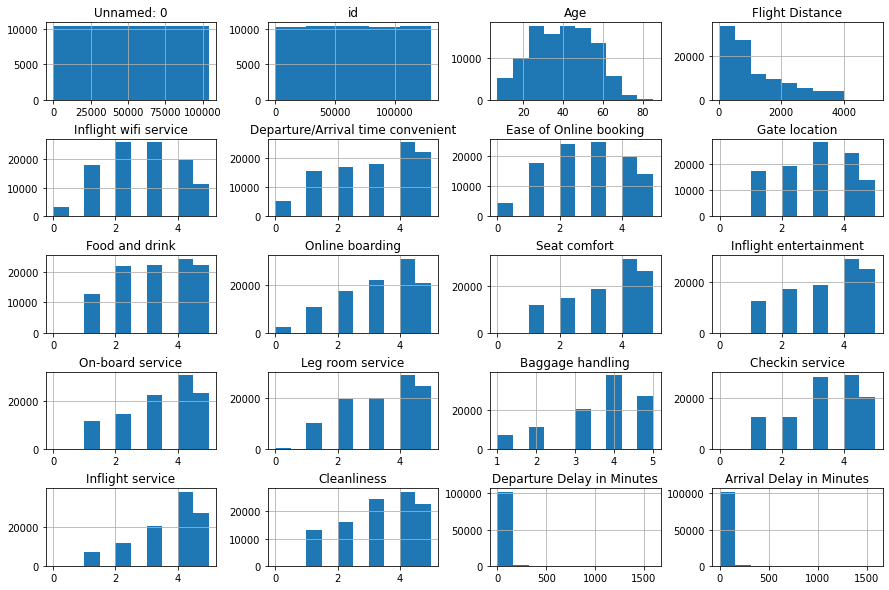

In [24]:
#View Distributions through histograms
airline_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [25]:
#Check number of passangers above the age of 50
airline_data[airline_data['Age'] > 50].T

,4,7,12,23,25,33,48,52,54,56,...,103871,103876,103881,103883,103887,103890,103891,103893,103896,103897
Unnamed: 0,4,7,12,23,25,33,48,52,54,56,...,103871,103876,103881,103883,103887,103890,103891,103893,103896,103897
id,119299,96462,98628,114090,102956,30089,53164,1050,125918,78972,...,29448,98579,9345,110591,54253,80087,83013,3397,71445,102203
Gender,Male,Female,Male,Female,Male,Female,Male,Female,Female,Female,...,Male,Female,Female,Female,Female,Female,Male,Female,Male,Female
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,...,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,61,52,53,58,57,67,54,69,60,57,...,74,58,51,65,51,56,54,58,57,60
Type of Travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Personal Travel,Business travel,Business travel,Personal Travel,Business travel,...,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Business,Business,Eco,Eco,Eco,Eco,Business,Eco,Eco,Business,...,Business,Business,Business,Eco,Eco,Eco Plus,Business,Business,Eco,Business
Flight Distance,214,2035,834,2139,719,1192,612,309,861,2496,...,1587,1987,384,488,1222,550,1991,296,867,1599
Inflight wifi service,3,4,1,4,4,4,3,5,2,0,...,1,5,2,3,5,3,5,3,4,5
Departure/Arrival time convenient,3,3,4,5,4,5,3,5,2,0,...,3,5,2,5,4,5,5,3,5,5


In [26]:
#Check number of passangers below the age of 50
airline_data[airline_data['Age'] < 50].T

,0,1,2,3,5,6,8,9,10,11,...,103888,103889,103892,103894,103895,103899,103900,103901,103902,103903
Unnamed: 0,0,1,2,3,5,6,8,9,10,11,...,103888,103889,103892,103894,103895,103899,103900,103901,103902,103903
id,70172,5047,110028,24026,111157,82113,79485,65725,34991,51412,...,115517,123802,46016,86549,66030,94171,73097,68825,54173,62567
Gender,Male,Male,Female,Female,Female,Male,Female,Male,Female,Female,...,Male,Female,Female,Male,Female,Female,Male,Male,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer,...,disloyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer
Age,13,25,26,25,26,47,41,20,24,12,...,38,43,37,26,24,23,49,30,22,27
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,Personal Travel,...,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Eco,Eco,Business,Eco,Eco,Eco Plus,...,Business,Business,Business,Business,Eco,Eco,Business,Business,Eco,Business
Flight Distance,460,235,1142,562,1180,1276,853,1061,1182,308,...,447,3885,596,712,1055,192,2347,1995,1000,1723
Inflight wifi service,3,3,2,2,3,2,1,3,4,2,...,2,5,3,4,1,2,4,1,1,1
Departure/Arrival time convenient,4,2,2,5,4,4,2,3,5,4,...,2,5,3,4,1,1,4,1,1,3


In [27]:
#Check if missing Age values
missing_age = airline_data[['Age']].isnull().sum(axis=1)
missing_age.value_counts()/len(missing_age) * 100

0    100.0
dtype: float64

In [28]:
missing = pd.concat([airline_data.isnull().sum(axis=1), 100 * airline_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
0,0,0.0
69267,0,0.0
69277,0,0.0
69276,0,0.0
69275,0,0.0
69274,0,0.0
69273,0,0.0
69272,0,0.0
69271,0,0.0
69270,0,0.0


In [29]:
missing['%'].unique()

array([0.])

In [30]:
missing['%'].value_counts()

0.0    103594
Name: %, dtype: int64

In [31]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [32]:
airline_data.shape

(103594, 25)

In [33]:
#Save data as csv file
airline_data.to_csv('airline_data.csv')

In this data set there were 310 missing values under 'Arrival Delay in Minutes' column, approximately 0.3% missing data. These values were dropped, no other missing values remain. 

**EDA Analysis **

In [34]:
airline_info = airline_data[['Age', 'Flight Distance','Baggage handling', 'Departure Delay in Minutes']]
airline_info.head()

,Age,Flight Distance,Baggage handling,Departure Delay in Minutes
0,13,460,4,25
1,25,235,3,1
2,26,1142,4,0
3,25,562,3,11
4,61,214,4,0


In [35]:
print(airline_info.describe())
print(airline_info.cov())

                 Age  Flight Distance  Baggage handling  \
count  103594.000000    103594.000000     103594.000000   
mean       39.380466      1189.325202          3.631687   
std        15.113125       997.297235          1.181051   
min         7.000000        31.000000          1.000000   
25%        27.000000       414.000000          3.000000   
50%        40.000000       842.000000          4.000000   
75%        51.000000      1743.000000          5.000000   
max        85.000000      4983.000000          5.000000   

       Departure Delay in Minutes  
count               103594.000000  
mean                    14.747939  
std                     38.116737  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                     12.000000  
max                   1592.000000  
                                    Age  Flight Distance  Baggage handling  \
Age                          228.406556      1504.779961         -

In [36]:
corr = airline_info.corr(method ='pearson')
print(corr)

                                 Age  Flight Distance  Baggage handling  \
Age                         1.000000         0.099838         -0.047619   
Flight Distance             0.099838         1.000000          0.063222   
Baggage handling           -0.047619         0.063222          1.000000   
Departure Delay in Minutes -0.010150         0.001906         -0.005683   

                            Departure Delay in Minutes  
Age                                          -0.010150  
Flight Distance                               0.001906  
Baggage handling                             -0.005683  
Departure Delay in Minutes                    1.000000  


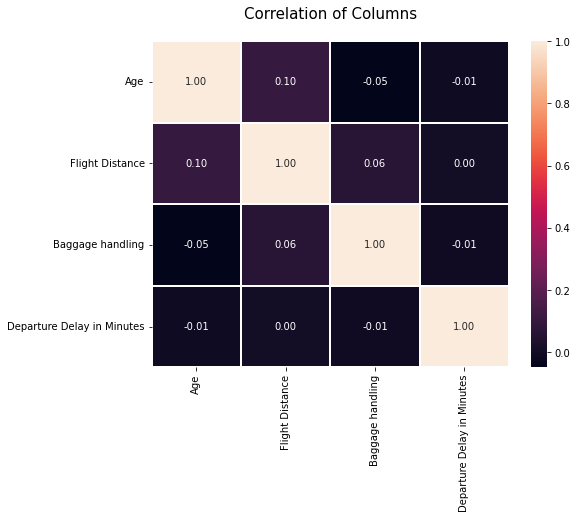

In [37]:
plt.figure(figsize = (8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt='.2f', linewidths=.30)
plt.title('Correlation of Columns', y =1.05,  size=15)
pos, textvals = plt.yticks()

Here, it is observed that the correlation is shown with color-coded matrices. The value of correlation ranging from -0.05 to 1.

In [38]:
#import libraries for statistical analysis
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter('ignore')

In [39]:
selector = VarianceThreshold()
airline_info_cleaned = selector.fit_transform(airline_info)
print(airline_info_cleaned.shape)
airline_info_cleaned = pd.DataFrame(airline_info_cleaned, columns = ['Age', 'Flight Distance','Baggage handling', 'Departure Delay in Minutes'])
airline_info_cleaned.head()


(103594, 4)


,Age,Flight Distance,Baggage handling,Departure Delay in Minutes
0,13,460,4,25
1,25,235,3,1
2,26,1142,4,0
3,25,562,3,11
4,61,214,4,0


<AxesSubplot:xlabel='Gender', ylabel='Count'>

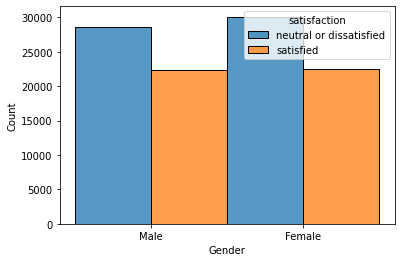

In [40]:
# Creating a plot with airline gender and satisfaction data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="Gender", hue="satisfaction", data=airline_data, stat="count", multiple="dodge")

The bar plot above shows airline Gender vs. Satisfaction data. In general, both genders have higher neutrality or dissatisfaction compared to satisfaction. Although it seems that there is a larger amount of female vs. male passangers overall. 

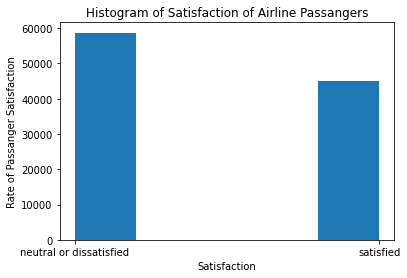

In [41]:
plt.hist(airline_data['satisfaction'], bins = 5)
plt.title('Histogram of Satisfaction of Airline Passangers')
plt.xlabel('Satisfaction')
plt.ylabel('Rate of Passanger Satisfaction')
plt.show()

Above is a histogram representing overall satisfaction. The major category is within 'neutral or dissatisfied'. This data does not contain a separate answer for neutral or dissatisfied so it is hard to tell if they are more neutral or dissatisfied. 

In [42]:
#Make satisfaction column numerical in value
airline_data['satisfaction'] = airline_data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [43]:
#Place passangers into age categories
import pandas as pd

sat_by_age = airline_data[['Age', 'satisfaction']]\
    .groupby(pd.cut(airline_data['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], right = False))[['satisfaction']].count()\
    .rename({'satisfaction': 'total_respondants'}, axis = 'columns')

sat_by_age

,total_respondants
Age,
"[0, 10)",1884
"[10, 20)",7896
"[20, 30)",20854
"[30, 40)",20593
"[40, 50)",23632
"[50, 60)",19053
"[60, 70)",8313
"[70, 80)",1274
"[80, 90)",95


In [44]:
sat_by_age['satisfied_count'] = airline_data[['Age', 'satisfaction']]\
    .groupby(pd.cut(airline_data['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], right = False))[['satisfaction']].sum()
             
sat_by_age

,total_respondants,satisfied_count
Age,,
"[0, 10)",1884,219
"[10, 20)",7896,1536
"[20, 30)",20854,7406
"[30, 40)",20593,8480
"[40, 50)",23632,13735
"[50, 60)",19053,10902
"[60, 70)",8313,2321
"[70, 80)",1274,280
"[80, 90)",95,18


In [45]:
#Compare Passangers by age vs. satisfied or neutral/dissatisfied
sat_by_age['percent_satisfied'] = \
    sat_by_age['satisfied_count'] / sat_by_age['total_respondants']

sat_by_age['percent_unsatisfied_or_neutral'] = \
    (sat_by_age['total_respondants'] - sat_by_age['satisfied_count']) / sat_by_age['total_respondants']

sat_by_age

,total_respondants,satisfied_count,percent_satisfied,percent_unsatisfied_or_neutral
Age,,,,
"[0, 10)",1884,219,0.116242,0.883758
"[10, 20)",7896,1536,0.194529,0.805471
"[20, 30)",20854,7406,0.355136,0.644864
"[30, 40)",20593,8480,0.411790,0.588210
"[40, 50)",23632,13735,0.581203,0.418797
"[50, 60)",19053,10902,0.572193,0.427807
"[60, 70)",8313,2321,0.279201,0.720799
"[70, 80)",1274,280,0.219780,0.780220
"[80, 90)",95,18,0.189474,0.810526


In the above table, shown is percent satisfied passangers vs. unsatisfied or neutral passangers based on age range. The majority of passangers are shown to be in 'unsatisfied or neutral' category based on age, except ages 40-50 and 50-60. 